# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [91]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [92]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [93]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027204961e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [94]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.79412040779e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [113]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 2.738422e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 3.865028e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


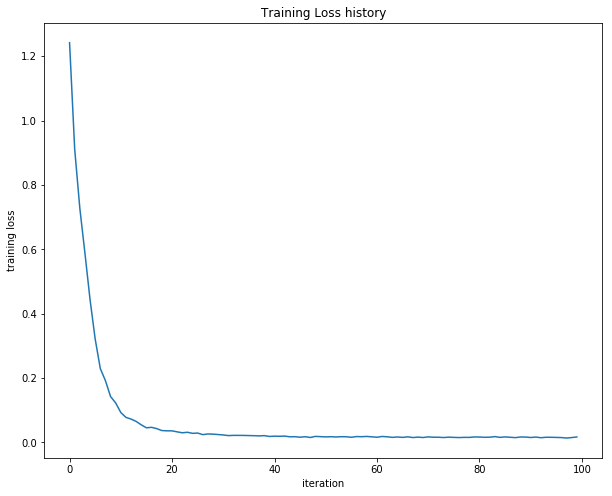

In [115]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [116]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [141]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302961
iteration 100 / 1000: loss 2.302569
iteration 200 / 1000: loss 2.297594
iteration 300 / 1000: loss 2.258878
iteration 400 / 1000: loss 2.199654
iteration 500 / 1000: loss 2.111355
iteration 600 / 1000: loss 2.129614
iteration 700 / 1000: loss 2.055739
iteration 800 / 1000: loss 2.011256
iteration 900 / 1000: loss 1.984406
Validation accuracy:  0.284


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

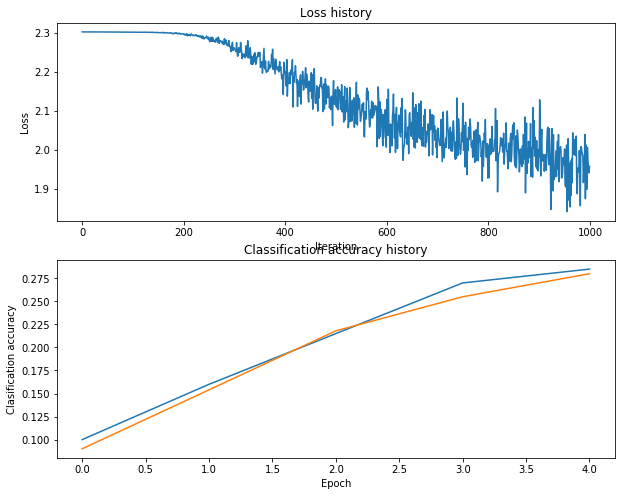

In [142]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

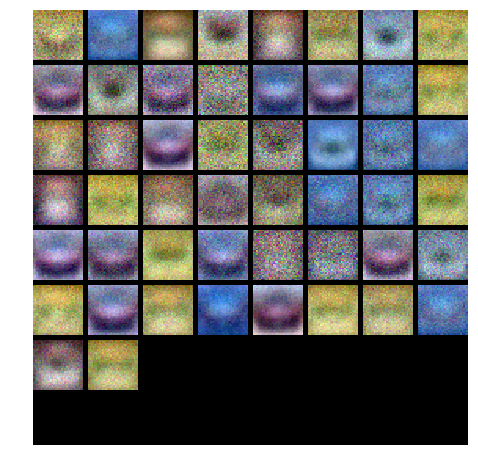

In [143]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [341]:
best_net = None # store the best model into this 

num_iters = 1200 # default 1000
batch_size = 200

input_size = 32 * 32 * 3
# one of the best size ~240
hidden_size = 240 #default hidden_size = 50
num_classes = 10

# one of the best rate: 0.001561402680729627
learning_rate = 0.001561402680729627

# our searching space 
learning_rate_pows = np.linspace(-3.1, -2.55, 8) # default learning_rate=1e-4
regularization_strength_pows = np.linspace(-10.0, 0.5, 8) #default reg=0.25
# hidden_size_space = np.linspace(100, 280, 2)

# for random layout
jitter_power = 0.5

results = {}

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
def search():
    """
    We have disabled hidden_size_space search dimension.
    """
    best_net = None # store the best model into this 
    best_acc = 0.0
    
    learning_rate_pow_step = learning_rate_pows[1] - learning_rate_pows[0]
    regularization_strength_pow_step = regularization_strength_pows[1] - regularization_strength_pows[0]
    # hidden_size_space_step = hidden_size_space[1] - hidden_size_space[0]
    
    results = {}

    total_iteration_num = len(learning_rate_pows) * len(regularization_strength_pows)
    current_iteration = 0
#     for hidden_size in hidden_size_space:
    for learning_rate_pow in learning_rate_pows:
        for regularization_strength_pow in regularization_strength_pows:

            # randomize layout
            learning_rate_pow_jitter = jitter_power * learning_rate_pow_step / 2 * np.random.randn()
            regularization_strength_jitter = jitter_power * regularization_strength_pow_step / 2 * np.random.randn()            
#             hidden_size_jitter = jitter_power * hidden_size_space_step / 2 * np.random.randn()
        
            # define params
            learning_rate = 10**(learning_rate_pow + learning_rate_pow_jitter)
            regularization_strength = 10**(regularization_strength_pow + regularization_strength_jitter)
#             hidden_size = int(hidden_size + hidden_size_jitter)

            print()
            print(f'rate: {learning_rate}')
            print(f'reg: {regularization_strength}')
            print(f'hidden_size: {hidden_size}')
            print()

            net = TwoLayerNet(input_size, hidden_size, num_classes)
            stats = net.train(X_train, y_train, X_val, y_val,
                              num_iters=num_iters, 
                              batch_size=batch_size,
                              learning_rate=learning_rate, 
                              learning_rate_decay=0.95,
                              reg=regularization_strength, 
                              verbose=True,
                             )

            # Predict on the validation set
            trained_accuracy = (net.predict(X_train) == y_train).mean()
            val_accuracy = (net.predict(X_val) == y_val).mean()
            
            print(f'train accuracy: {trained_accuracy}')
            print(f'val accuracy: {val_accuracy}')
            filled = int(80*current_iteration/total_iteration_num)
            print('*' * filled + '-' * (80 - filled))
            current_iteration+=1
            if best_acc < val_accuracy:
                best_acc = val_accuracy
                best_net = net

            results[(
                learning_rate,
                regularization_strength,
                hidden_size,
            )] = (
                trained_accuracy, 
                val_accuracy,
            )
                
    return best_net, results

                
%time best_net, results = search()

# and then train more on the best network
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################


rate: 0.0008068459150268056
reg: 4.3189685118281395e-10
hidden_size: 240

iteration 0 / 1200: loss 2.302628
iteration 100 / 1200: loss 2.003601
iteration 200 / 1200: loss 1.836653
iteration 300 / 1200: loss 1.636109
iteration 400 / 1200: loss 1.642043
iteration 500 / 1200: loss 1.494690
iteration 600 / 1200: loss 1.557540
iteration 700 / 1200: loss 1.486750
iteration 800 / 1200: loss 1.452618
iteration 900 / 1200: loss 1.443020
iteration 1000 / 1200: loss 1.438837
iteration 1100 / 1200: loss 1.312871
train accuracy: 0.5215714285714286
val accuracy: 0.487
--------------------------------------------------------------------------------

rate: 0.0008201243588181237
reg: 2.1201572898546854e-09
hidden_size: 240

iteration 0 / 1200: loss 2.302642
iteration 100 / 1200: loss 1.951942
iteration 200 / 1200: loss 1.799405
iteration 300 / 1200: loss 1.703677
iteration 400 / 1200: loss 1.594597
iteration 500 / 1200: loss 1.588497
iteration 600 / 1200: loss 1.540391
iteration 700 / 1200: loss 1.686

train accuracy: 0.5233061224489796
val accuracy: 0.495
***************-----------------------------------------------------------------

rate: 0.000908247540221949
reg: 0.0013092145951955974
hidden_size: 240

iteration 0 / 1200: loss 2.302545
iteration 100 / 1200: loss 2.000640
iteration 200 / 1200: loss 1.709463
iteration 300 / 1200: loss 1.589677
iteration 400 / 1200: loss 1.591418
iteration 500 / 1200: loss 1.450280
iteration 600 / 1200: loss 1.462641
iteration 700 / 1200: loss 1.422117
iteration 800 / 1200: loss 1.499934
iteration 900 / 1200: loss 1.470566
iteration 1000 / 1200: loss 1.513529
iteration 1100 / 1200: loss 1.336583
train accuracy: 0.5272244897959184
val accuracy: 0.497
****************----------------------------------------------------------------

rate: 0.0010155003554768176
reg: 0.04584062988561592
hidden_size: 240

iteration 0 / 1200: loss 2.302944
iteration 100 / 1200: loss 1.905407
iteration 200 / 1200: loss 1.682118
iteration 300 / 1200: loss 1.642710
iteration

iteration 900 / 1200: loss 1.343214
iteration 1000 / 1200: loss 1.421452
iteration 1100 / 1200: loss 1.391837
train accuracy: 0.5224897959183673
val accuracy: 0.476
*******************************-------------------------------------------------

rate: 0.0012831599451712152
reg: 5.767883464318011e-08
hidden_size: 240

iteration 0 / 1200: loss 2.302533
iteration 100 / 1200: loss 1.881970
iteration 200 / 1200: loss 1.699575
iteration 300 / 1200: loss 1.595620
iteration 400 / 1200: loss 1.665519
iteration 500 / 1200: loss 1.484701
iteration 600 / 1200: loss 1.461919
iteration 700 / 1200: loss 1.306054
iteration 800 / 1200: loss 1.421572
iteration 900 / 1200: loss 1.512783
iteration 1000 / 1200: loss 1.246705
iteration 1100 / 1200: loss 1.349696
train accuracy: 0.534795918367347
val accuracy: 0.488
********************************------------------------------------------------

rate: 0.0013842049327696308
reg: 2.6576483344198505e-06
hidden_size: 240

iteration 0 / 1200: loss 2.302584
iter

iteration 600 / 1200: loss 1.513741
iteration 700 / 1200: loss 1.443397
iteration 800 / 1200: loss 1.626604
iteration 900 / 1200: loss 1.438188
iteration 1000 / 1200: loss 1.408267
iteration 1100 / 1200: loss 1.514202
train accuracy: 0.5419591836734694
val accuracy: 0.492
***********************************************---------------------------------

rate: 0.0016455435256490171
reg: 14.170892044887012
hidden_size: 240

iteration 0 / 1200: loss 2.407501
iteration 100 / 1200: loss 2.214229
iteration 200 / 1200: loss 2.153951
iteration 300 / 1200: loss 2.145613
iteration 400 / 1200: loss 2.199882
iteration 500 / 1200: loss 2.172980
iteration 600 / 1200: loss 2.159449
iteration 700 / 1200: loss 2.162163
iteration 800 / 1200: loss 2.183875
iteration 900 / 1200: loss 2.186021
iteration 1000 / 1200: loss 2.160327
iteration 1100 / 1200: loss 2.114531
train accuracy: 0.318
val accuracy: 0.328
************************************************--------------------------------

rate: 0.00223600450

iteration 300 / 1200: loss 1.673525
iteration 400 / 1200: loss 1.677789
iteration 500 / 1200: loss 1.567812
iteration 600 / 1200: loss 1.639479
iteration 700 / 1200: loss 1.714405
iteration 800 / 1200: loss 1.550462
iteration 900 / 1200: loss 1.543279
iteration 1000 / 1200: loss 1.398760
iteration 1100 / 1200: loss 1.338646
train accuracy: 0.48346938775510206
val accuracy: 0.432
***************************************************************-----------------

rate: 0.0025379494225639494
reg: 2.2764892915076684e-05
hidden_size: 240

iteration 0 / 1200: loss 2.302597
iteration 100 / 1200: loss 1.829817
iteration 200 / 1200: loss 1.764171
iteration 300 / 1200: loss 1.754542
iteration 400 / 1200: loss 1.509237
iteration 500 / 1200: loss 1.689111
iteration 600 / 1200: loss 1.359894
iteration 700 / 1200: loss 1.541876
iteration 800 / 1200: loss 1.514719
iteration 900 / 1200: loss 1.497287
iteration 1000 / 1200: loss 1.262113
iteration 1100 / 1200: loss 1.486833
train accuracy: 0.541673469387

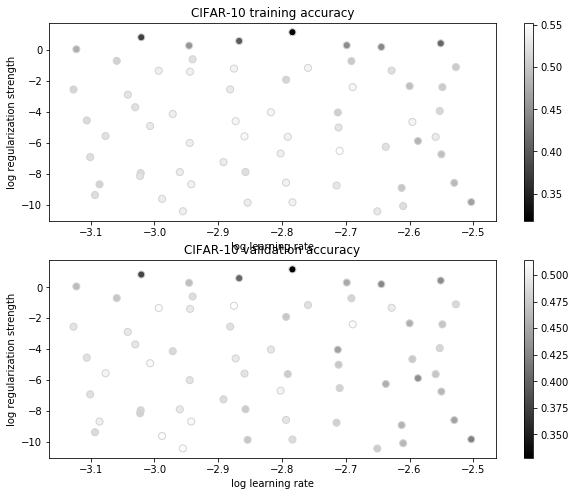

In [342]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 50
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, edgecolors='lightgrey')
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, edgecolors='lightgrey')
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [351]:
# retrain with more iterations 2000

sorted_results = sorted(results.items(), key=lambda x: x[1][1])
print(sorted_results[-1])

(
    best_learning_rate,
    best_regularization_strength,
    hidden_size,
) = sorted_results[-1][0]

print('The best params are:')
print(f'rate: {learning_rate}')
print(f'reg: {regularization_strength}')
print(f'hidden_size: {hidden_size}')
print()

net = TwoLayerNet(input_size, hidden_size, num_classes)
stats = net.train(X_train, y_train, X_val, y_val,
                  num_iters=2000, 
                  batch_size=batch_size,
                  learning_rate=best_learning_rate, 
                  learning_rate_decay=0.95,
                  reg=best_regularization_strength, 
                  verbose=True,
                 )

# it is our the best net
best_net = net

((0.0013325965752821593, 0.063403713971128248, 240), (0.54206122448979588, 0.51400000000000001))
The best params are:
rate: 0.0013325965752821593
reg: 0.06340371397112825
hidden_size: 240

iteration 0 / 2000: loss 2.303048
iteration 100 / 2000: loss 1.818021
iteration 200 / 2000: loss 1.477965
iteration 300 / 2000: loss 1.614032
iteration 400 / 2000: loss 1.502333
iteration 500 / 2000: loss 1.649422
iteration 600 / 2000: loss 1.559665
iteration 700 / 2000: loss 1.560154
iteration 800 / 2000: loss 1.379756
iteration 900 / 2000: loss 1.489229
iteration 1000 / 2000: loss 1.400654
iteration 1100 / 2000: loss 1.275623
iteration 1200 / 2000: loss 1.376297
iteration 1300 / 2000: loss 1.508005
iteration 1400 / 2000: loss 1.476782
iteration 1500 / 2000: loss 1.298920
iteration 1600 / 2000: loss 1.272644
iteration 1700 / 2000: loss 1.289317
iteration 1800 / 2000: loss 1.344122
iteration 1900 / 2000: loss 1.268521


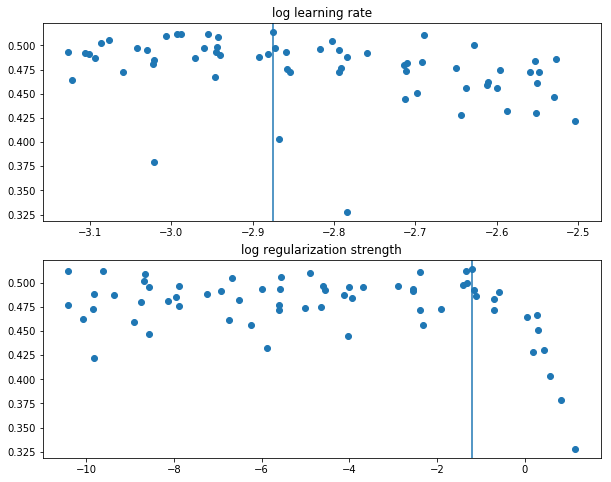

In [358]:
# draw accuracy by each parameter
# what is really fun that accuracy still pretty for almost 0 regularization

accuracy = [results[x][1] for x in results]
x_scatter = [math.log10(x[0]) for x in results]
plt.subplot(2, 1, 1)
plt.plot(x_scatter, accuracy, 'o')
plt.axvline(np.log(best_learning_rate)/np.log(10))
plt.title('log learning rate')

y_scatter = [math.log10(x[1]) for x in results]
plt.subplot(2, 1, 2)
plt.axvline(np.log(best_regularization_strength)/np.log(10))
plt.plot(y_scatter, accuracy, 'o')
plt.title('log regularization strength');

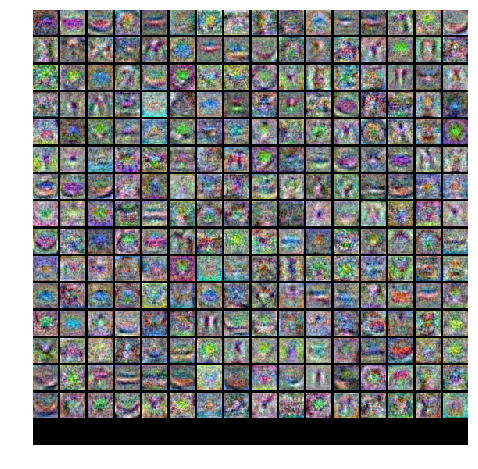

In [359]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [360]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.532


In [361]:
# play rolling sound at the end of the notebook :)
# very useful for long training

from IPython.display import HTML
video_id = 'mzAfTmC3It0'
HTML(f'<iframe width="560" height="315" src="https://www.youtube.com/embed/{video_id}?rel=0&amp;controls=1&amp;showinfo=0&autoplay=1" frameborder="0" allowfullscreen></iframe>')